In [1]:
#Import Library
import pandas as pd

In [2]:
#Data preparation
df = pd.read_csv("data.csv")

In [3]:
#Cek dimensi data
df.shape

(128061, 9)

In [4]:
#Menampilkan 5 data teratas
df.head(5)

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,Unknown,ENFP
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,Unknown,ENFP
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP


In [5]:
df.tail(5)

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
128056,27.0,Male,0,5.11456,7.764336,5.72341,2.686904,Arts,ESTP
128057,19.0,Male,0,3.00078,2.525392,4.71081,3.657814,Unknown,INFP
128058,26.0,Female,1,8.16219,3.433857,2.45531,5.541144,Arts,ENFP
128059,24.0,Male,0,9.37782,5.077443,1.79598,6.762643,Unknown,ENFJ
128060,27.0,Male,0,7.78827,4.770737,3.18600,6.204355,Others,ENFJ


In [6]:
# import library
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [7]:
#Cek tipe data
df.dtypes

Age                   float64
Gender                 object
Education               int64
Introversion Score    float64
Sensing Score         float64
Thinking Score        float64
Judging Score         float64
Interest               object
Personality            object
dtype: object

In [8]:
#statistik dasar
df.describe()

,Age,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score
count,128061.000000,128061.000000,128061.000000,128061.000000,128061.000000,128061.000000
mean,26.349091,0.411156,4.996387,5.081893,4.988040,4.578293
std,4.908022,0.492045,2.888636,1.183236,2.886018,1.391582
min,18.000000,0.000000,0.000040,0.000000,0.000050,0.000000
25%,23.000000,0.000000,2.490710,4.315659,2.488630,3.709353
50%,25.000000,0.000000,4.993640,5.124169,4.984180,4.690653
75%,29.000000,1.000000,7.500170,5.892288,7.492550,5.561229
max,57.000000,1.000000,9.999990,9.788815,9.999970,9.840494


In [9]:
# Misalkan batas bawah dan atas didefinisikan berdasarkan IQR
Q1 = df.select_dtypes(exclude=['object']).quantile(0.25)
Q3 = df.select_dtypes(exclude=['object']).quantile(0.75)
IQR = Q3 - Q1

In [10]:
batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

In [11]:
# Pilih kolom numerik dari dataframe
numeric_cols = df.select_dtypes(exclude=['object'])

In [12]:
# Membuat filter untuk mendeteksi outliers
outlier_filter = (numeric_cols < batas_bawah) | (numeric_cols > batas_atas)

In [13]:
# Menampilkan data yang terdeteksi sebagai outlier
outliers = df[outlier_filter.any(axis=1)]

In [14]:
q1 = df.select_dtypes(exclude="object").quantile(0.25)
q3 = df.select_dtypes(exclude="object").quantile(0.75)
iqr = q3-q1
iqr

Age                   6.000000
Education             1.000000
Introversion Score    5.009460
Sensing Score         1.576629
Thinking Score        5.003920
Judging Score         1.851876
dtype: float64

In [15]:
batas_atas = q3 + 1.5 * iqr
batas_atas

Age                   38.000000
Education              2.500000
Introversion Score    15.014360
Sensing Score          8.257232
Thinking Score        14.998430
Judging Score          8.339044
dtype: float64

In [16]:
# Cek Missing Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128061 entries, 0 to 128060
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Age                 128061 non-null  float64
 1   Gender              128061 non-null  object 
 2   Education           128061 non-null  int64  
 3   Introversion Score  128061 non-null  float64
 4   Sensing Score       128061 non-null  float64
 5   Thinking Score      128061 non-null  float64
 6   Judging Score       128061 non-null  float64
 7   Interest            128061 non-null  object 
 8   Personality         128061 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 8.8+ MB


In [17]:
# Missing values (Menghasilkan DataFrame dengan nilai boolean, di mana setiap elemen adalah True jika nilai pada posisi tersebut adalah null (kosong), dan False jika ada nilai)
df.isnull().sum()

Age                   0
Gender                0
Education             0
Introversion Score    0
Sensing Score         0
Thinking Score        0
Judging Score         0
Interest              0
Personality           0
dtype: int64

In [18]:
# Fitur Selection
X= df.iloc[:, [3,4]].values

In [19]:
#Model K-means
X = df.select_dtypes(exclude=['object']).values

In [20]:
# Import library KMeans dari sklearn
from sklearn.cluster import KMeans

In [21]:
# Definisikan list kosong untuk menyimpan WCSS (Within-Cluster Sum of Squares)
wcss = []

In [22]:
# Diasumsikan bahwa jumlah maksimal cluster yang mungkin ada dalam dataset adalah 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)  # X adalah dataset yang akan dikelompokkan
    wcss.append(kmeans.inertia_)  # Menyimpan inertia ke dalam list wcss

OpenBLAS warning: precompiled NUM_THREADS exceeded, adding auxiliary array for thread metadata.
To avoid this warning, please rebuild your copy of OpenBLAS with a larger NUM_THREADS setting
or set the environment variable OPENBLAS_NUM_THREADS to 64 or lower


In [23]:
# Menampilkan WCSS untuk setiap jumlah cluster
print(wcss)

[5678265.045724953, 3607202.4723814027, 3043314.9527554596, 2654576.980478098, 2354272.542677591, 2115674.7088072565, 1928668.4405826696, 1783712.8176086692, 1662793.0088784017, 1581879.1256274174]


In [24]:
#Diasumsikan bahwa jumlah maksimal cluster yang mungkin ada dalam dataset adalah 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [25]:
#Visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

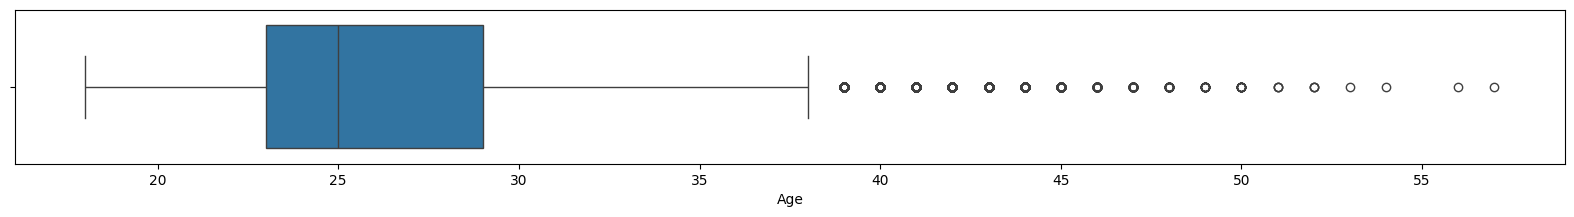

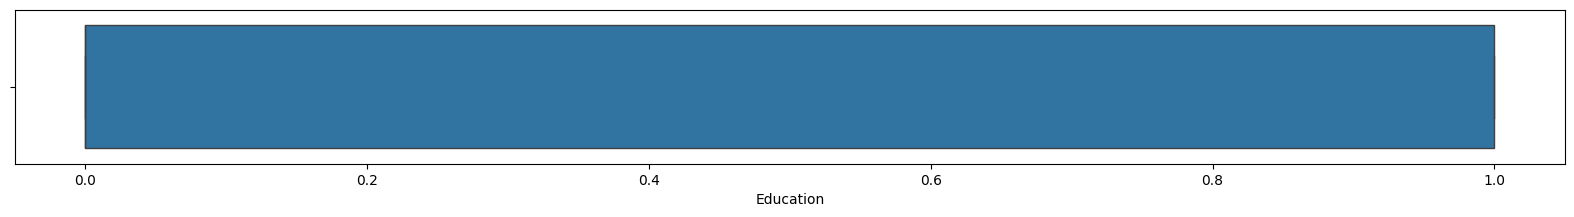

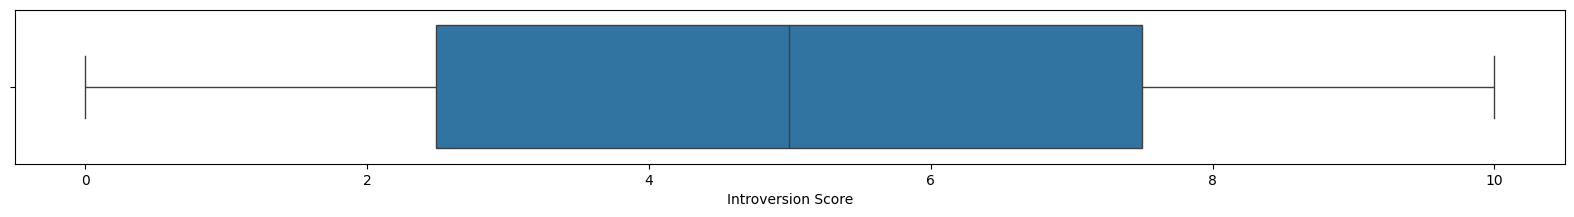

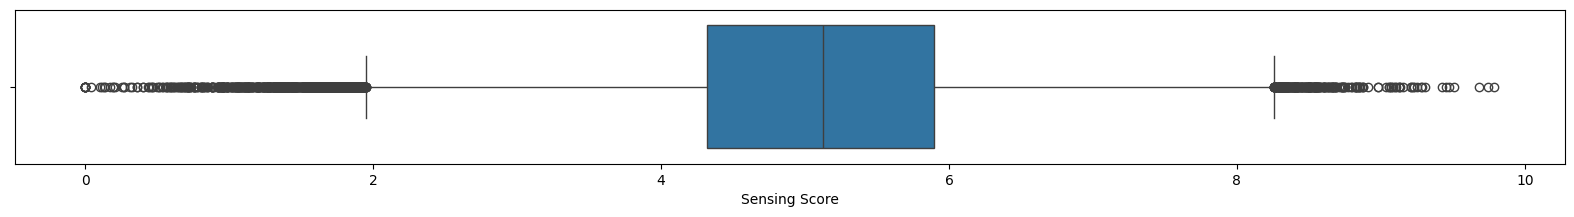

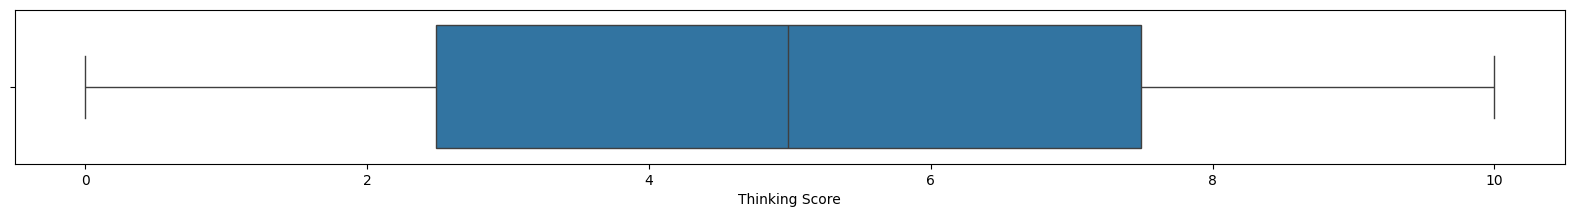

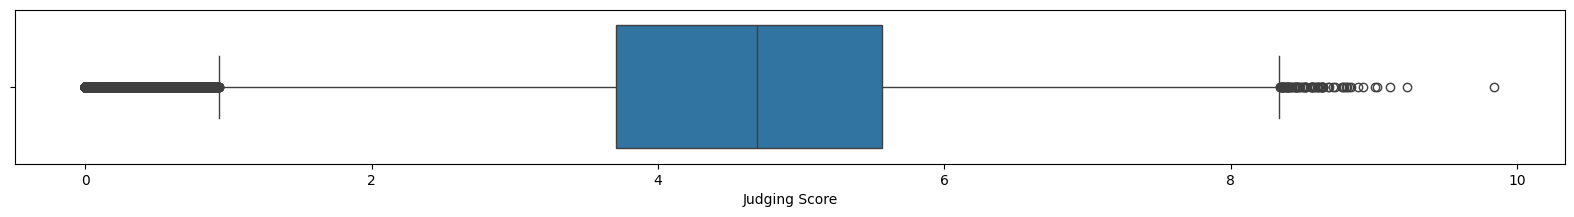

In [26]:
# Mencari Outliers - Boxplot
df_outlier = df.select_dtypes(exclude=['object'])
for column in df_outlier:
        plt.figure(figsize=(20,2))
        sns.boxplot(data=df_outlier, x=column)

In [27]:
# Import library matplotlib
import matplotlib.pyplot as plt

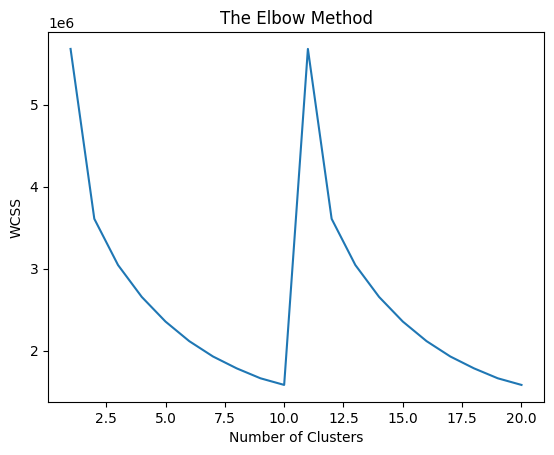

In [28]:
# Visualisasi ELBOW
plt.plot(range(1, len(wcss) + 1), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:
# Pada plot ini, akan ada titik di mana kurva mulai menurun dengan lebih lambat, 
# membentuk sudut (mirip seperti siku atau "elbow"). Sudut terakhir dari kurva ini muncul ketika k=5, 
# yang menunjukkan bahwa 5 adalah jumlah optimal cluster.

# Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

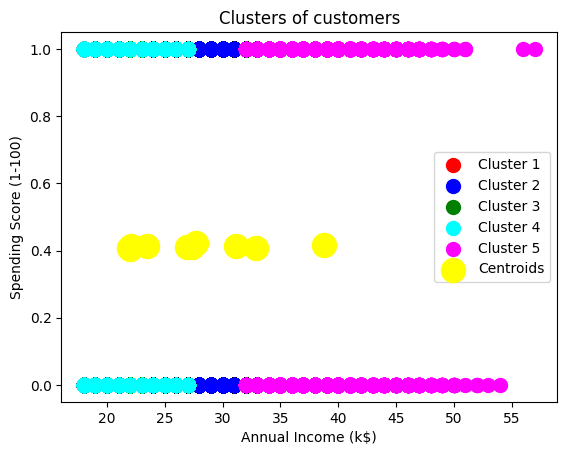

In [30]:
# Visualiasi semua clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()